This is in julia. kinda just tells you how to set up and solve an ODE with DifferentialEquations package, I'm like 90% sure Alia found a better DiffEq solver. Simple harmonic oscillator.

# Simple Julia ODE solver

In [1]:
using Plots
using Printf
using DifferentialEquations
using DataFrames
using CSV

The next chunk of code sets up and does the solving of the ODE. This example solves the simple harmonic oscillator $\ddot{x} = -kx$. Here we employ the trick of writing a second order ODE as two coupled first order ODEs by defining $$du = \dot{x}$$

then $$\dot{du} = \ddot{x}$$

substituting  $\ddot{x} = -kx$ our second order ODE has become the system:

$$\dot{x} = du$$

$$\dot{du} = -kx$$

which we can solve simultaneously. Here we choose the Runge-Kutta fourth order integration method.

In [21]:
# Parameters
const k = 3

#Initial Conditions and time setup
u₀ = [0.0, 1.5] # xdot_0, x_0,
tspan = (0.0, 5)

#Define the problem - this is the main part that changes with each differential equation
function diffyqs(du, u, p, t)
    x = u[1]
    xdot = u[2]
    du[1] = xdot
    du[2] = -k*x # actual diffq of interest ( in 2nd order case)
    # could add many more diffyqs here if need be
end

# Pass to solvers
prob = ODEProblem(diffyqs, u₀, tspan)
sol = solve(prob, RK4()) # <3 RK4
print()

Let's plot the results:

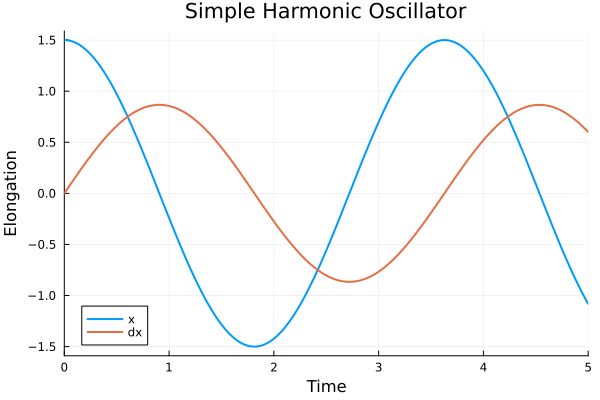

In [13]:
# Plot
plot(sol, vars = [2, 1], linewidth = 2, title = "Simple Harmonic Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])

If you'd like to unpack this solution further, it can be done like this:

In [20]:
t = sol.t
sol_values = sol.u

x = []
xdot = []

for v in sol_values # there is most certainly a better index-y way to do this
    push!(xdot,v[1])
    push!(x,v[2]) 
end
print()

Exporting data to CSV:

In [19]:
df = DataFrame(sol)
#CSV.write("C:\\Users\\walki\\Desktop\\Juila\\export_df_test.csv",df) 
print()

for reading in data use: `df = DataFrame(CSV.File("file.csv"))`

In [22]:
# example of higher order system differential equation funciton
function diffyqs(du, u, p, t)
    x = u[1]
    y = u[2]
    dx = u[3]
    dy = u[4]
    du[1] = dx
    du[2] = dy
    du[3] = -x - 2x * y
    du[4] = y^2 - y - x^2
end
print()